### Import data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df=pd.read_csv('simple_schedule.csv')
df

,Task,start,end
0,Task A,14-Jun-2021,18-Jun-2021
1,Task B,16-Jun-2021,24-Jun-2021
2,Task C,18-Jun-2021,22-Jun-2021
3,Task D,22-Jun-2021,25-Jun-2021


In [3]:
    df.start=pd.to_datetime(df.start)
    df.end=pd.to_datetime(df.end)
    df

,Task,start,end
0,Task A,2021-06-14,2021-06-18
1,Task B,2021-06-16,2021-06-24
2,Task C,2021-06-18,2021-06-22
3,Task D,2021-06-22,2021-06-25


In [4]:
df['duration']=df.end-df.start
df

,Task,start,end,duration
0,Task A,2021-06-14,2021-06-18,4 days
1,Task B,2021-06-16,2021-06-24,8 days
2,Task C,2021-06-18,2021-06-22,4 days
3,Task D,2021-06-22,2021-06-25,3 days


In [5]:
#convert duration to number and add one
df.duration=df.duration.apply(lambda x: x.days+1)
#sort in ascending order of start date
df=df.sort_values(by='start', ascending=True)
df

,Task,start,end,duration
0,Task A,2021-06-14,2021-06-18,5
1,Task B,2021-06-16,2021-06-24,9
2,Task C,2021-06-18,2021-06-22,5
3,Task D,2021-06-22,2021-06-25,4


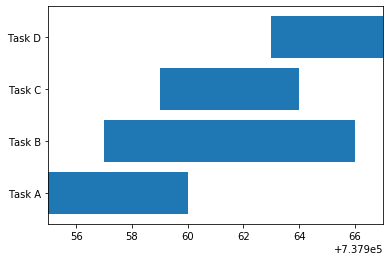

In [6]:
plt.barh(y=df.Task, left=df.start, width=df.duration)
plt.show()

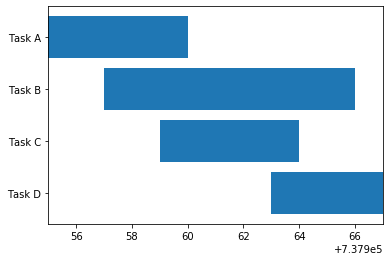

In [7]:
plt.barh(y=df.Task, left=df.start, width=df.duration)
plt.gca().invert_yaxis()
plt.show()

In [9]:
p_start=df.start.min()
p_end=df.end.max()
p_duration=(p_end-p_start).days+1

print('project duration :', p_duration)
print('project start date :', p_start)
print('project end date :', p_end)

project duration : 12
project start date : 2021-06-14 00:00:00
project end date : 2021-06-25 00:00:00


In [15]:
#xticks
x_ticks=[i for i in range(p_duration+1)]
#xtick labels starts with project start date |formatted
x_labels=[(p_start+dt.timedelta(days=i)).strftime('%d-%b') 
          for i in x_ticks]
print('x-ticks: ', x_ticks)
print('x-tick labels :', x_labels)

x-ticks:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x-tick labels : ['14-Jun', '15-Jun', '16-Jun', '17-Jun', '18-Jun', '19-Jun', '20-Jun', '21-Jun', '22-Jun', '23-Jun', '24-Jun', '25-Jun', '26-Jun']


In [16]:
df['rel_start']=df.start.apply(lambda x: (x-p_start).days)
df

,Task,start,end,duration,rel_start
0,Task A,2021-06-14,2021-06-18,5,0
1,Task B,2021-06-16,2021-06-24,9,2
2,Task C,2021-06-18,2021-06-22,5,4
3,Task D,2021-06-22,2021-06-25,4,8


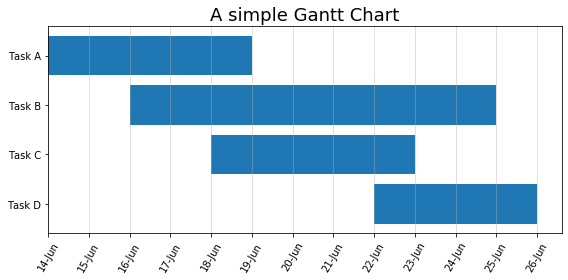

In [23]:
plt.figure(figsize=(8,4))
#plot barh chart
plt.barh(y=df.Task, left=df.rel_start, width=df.duration)

#Invert y axis
plt.gca().invert_yaxis()

#customize x-ticks
plt.xticks(ticks=x_ticks, labels=x_labels)

#Title
plt.title('A simple Gantt Chart', size=18)
#rotate x-ticks
plt.xticks(rotation=60)

#add grid lines
plt.grid(axis='x', alpha=0.5)

#save fig
plt.savefig('simple_gantt.png')

plt.tight_layout()
plt.show()

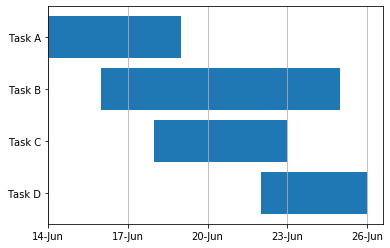

In [104]:
plt.barh(y=df.Task, left=df.rel_start, width=df.duration)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
#plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

### Complex GANTT Chart

In [18]:
df =pd.read_csv('schedule.csv')
df.head()

,Task,start,end,Department,Completion
0,Task A,14-Jun-2021,18-Jun-2021,Mkt,100
1,Task B,16-Jun-2021,24-Jun-2021,Fin,100
2,Task C,18-Jun-2021,22-Jun-2021,Fin,100
3,Task D,22-Jun-2021,25-Jun-2021,Mkt,90
4,Task E,22-Jun-2021,30-Jun-2021,HR,60


### Basic Chart

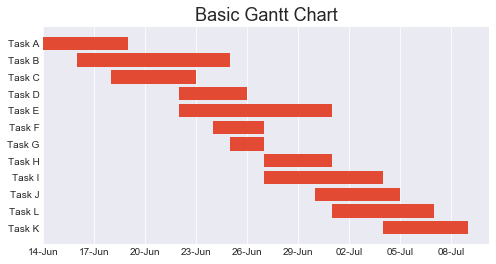

In [59]:
#Convert dates to datetime format
df.start=pd.to_datetime(df.start)
df.end=pd.to_datetime(df.end)

#Add Duration
df['duration']=df.end-df.start
df.duration=df.duration.apply(lambda x: x.days+1)

#sort in ascending order of start date
df=df.sort_values(by='start', ascending=True)

#project level variables
p_start=df.start.min()
p_end=df.end.max()
p_duration=(p_end-p_start).days+1

#Add relative date
df['rel_start']=df.start.apply(lambda x: (x-p_start).days)

#Create custom x-ticks and x-tick labels
x_ticks=[i for i in range(p_duration+1)]
x_labels=[(p_start+dt.timedelta(days=i)).strftime('%d-%b') 
          for i in x_ticks]

#Create horizontal bar-graph with y=task, left=Duration and left=relative start date; invert y-axis
plt.figure(figsize=(8,4))
plt.title('Basic Gantt Chart', size=18)
plt.barh(y=df.Task, left=df.rel_start, width=df.duration)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
#plt.xticks(rotation=90)
plt.grid(axis='x')
plt.savefig('fig1.png')
plt.show()

### Adding Percentage completion

In [27]:
df['w_comp']=round(df.Completion*df.duration/100,2)
df.head()

,Task,start,end,Department,Completion,duration,rel_start,w_comp
0,Task A,2021-06-14,2021-06-18,Mkt,100,5,0,5.0
1,Task B,2021-06-16,2021-06-24,Fin,100,9,2,9.0
2,Task C,2021-06-18,2021-06-22,Fin,100,5,4,5.0
3,Task D,2021-06-22,2021-06-25,Mkt,90,4,8,3.6
4,Task E,2021-06-22,2021-06-30,HR,60,9,8,5.4


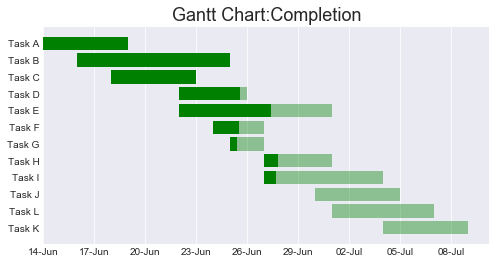

In [60]:
plt.figure(figsize=(8,4))
plt.title('Gantt Chart:Completion', size=18)

#Light bar for entire task
plt.barh(y=df.Task, left=df.rel_start, width=df.duration, 
         alpha=0.4, color='green')
#Darker bar for completed part
plt.barh(y=df.Task, left=df.rel_start, width=df.w_comp, 
         alpha=1, color='green')

plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.savefig('fig1.png')
plt.show()

### Coloring based on Department

In [32]:
c_dict={'Mkt':'red', 'Fin':'green', 'HR':'blue'}

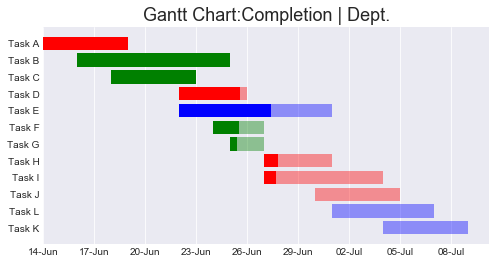

In [61]:
plt.figure(figsize=(8,4))
plt.title('Gantt Chart:Completion | Dept.', size=18)

for i in range(df.shape[0]):
    color=c_dict[df.Department[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.4, 
             color=color)
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color)
    
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.savefig('fig1.png')
plt.show()

### Sorting by Department

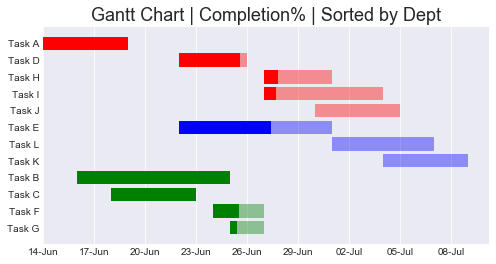

In [64]:
#Sort based on Department
df=df.sort_values(by='Department', 
                  ascending=False).reset_index(drop=True)

plt.figure(figsize=(8,4))
plt.title('Gantt Chart | Completion% | Sorted by Dept', size=18)
for i in range(df.shape[0]):
    color=c_dict[df.Department[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.4, 
             color=color)
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.savefig('fig1.png')
plt.show()

### Adding completion and Legend

In [40]:
yticks=[i for i in range(len(df.Task))]

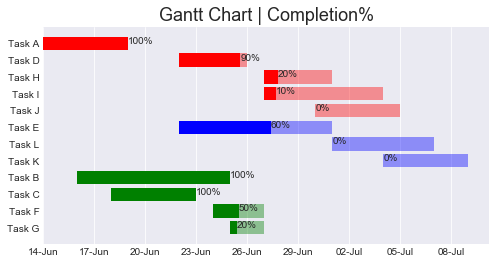

In [66]:
plt.figure(figsize=(8,4))
plt.title('Gantt Chart | Completion%', size=18)

for i in range(df.shape[0]):
    color=c_dict[df.Department[i]]
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.4, 
             color=color)
    plt.barh(y=df.Task[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color)
    plt.text(x=df.rel_start[i]+df.w_comp[i],
             y=yticks[i],
             s=f'{df.Completion[i]}%')
    
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

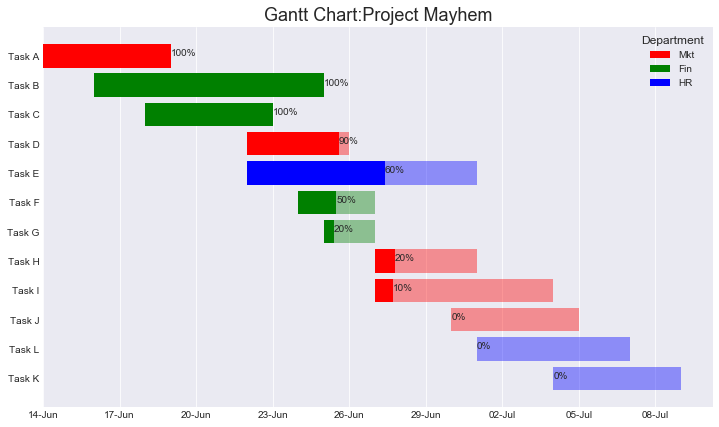

In [72]:
plt.figure(figsize=(12,7))
plt.title('Gantt Chart:Project Mayhem', size=18)

for i in range(df.shape[0]):
    color=c_dict[df.Department[i]]
    plt.barh(y=yticks[i], left=df.rel_start[i], 
             width=df.duration[i], alpha=0.4, 
             color=color)
    plt.barh(y=yticks[i], left=df.rel_start[i], 
             width=df.w_comp[i], alpha=1, color=color,
            label=df.Department[i])
    plt.text(x=df.rel_start[i]+df.w_comp[i],
             y=yticks[i],
             s=f'{df.Completion[i]}%')
    
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.yticks(ticks=yticks, labels=df.Task)
plt.grid(axis='x')

#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, fontsize='medium', 
           title='Department', title_fontsize='large')

plt.savefig('fig1.png')
plt.show()